In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 5, Finished, Available)

2024-03-04 01:49:52.118604: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 01:49:56.475524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 6, Finished, Available)

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/lakehouse/default/Files/BrainTumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 7, Finished, Available)

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 8, Finished, Available)

In [5]:
data = np.array(data)
data.shape

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 9, Finished, Available)

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 10, Finished, Available)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 11, Finished, Available)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 12, Finished, Available)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 13, Finished, Available)

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 14, Finished, Available)

Epoch 1/30
3/3 [==============================] - 4s 421ms/step - loss: 0.1822 - val_loss: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 1s 345ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 1s 347ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 1s 321ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 1s 336ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 1s 335ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 1s 328ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/30
3/3

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 15, Finished, Available)

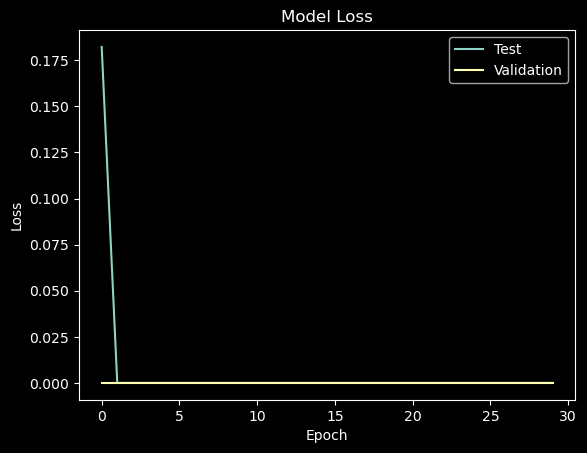

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 16, Finished, Available)

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 17, Finished, Available)

2024-03-04 01:51:11.715895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype uint8 and shape [1,128,128,3]
	 [[{{node Placeholder/_0}}]]


100.0% Confidence This Is Its a Tumor


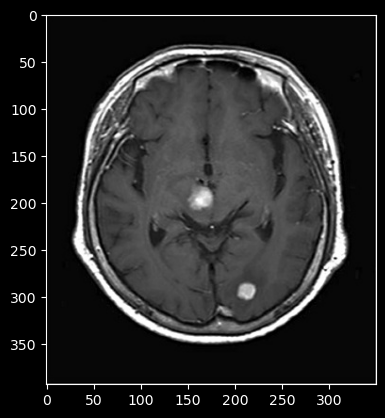

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"/lakehouse/default/Files/BrainTumor/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 18, Finished, Available)

100.0% Confidence This Is A Its a Tumor


2024-03-04 01:51:12.914523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype uint8 and shape [1,128,128,3]
	 [[{{node Placeholder/_0}}]]


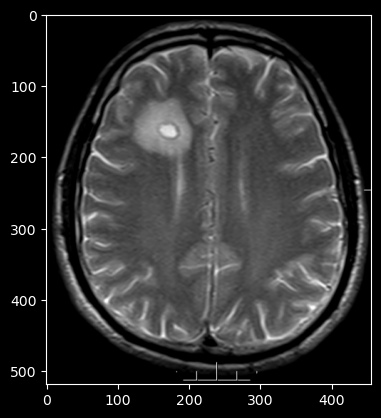

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"/lakehouse/default/Files/BrainTumor/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [15]:
y_pred = model.predict(x_test)

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 19, Finished, Available)

1/1 [==============================] - 0s 117ms/step


In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_test)
acc

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 20, Finished, Available)

1.0

In [17]:
model.save("/lakehouse/default/Files/Models/braintumor.h5")

StatementMeta(, 8c9fb2b2-bec1-442f-b129-5a74852b03fd, 21, Finished, Available)